# Python CSV

The CSV module implements classes to read and write tabular data (rows and columns) in `.csv` format

In [51]:
# import the library
import csv
from seaborn import load_dataset

In [52]:
# load some sample data to work with from the seaborn library
data_df = load_dataset('penguins')
data1 = data_df.to_numpy()
data1 # array of lists

array([['Adelie', 'Torgersen', 39.1, ..., 181.0, 3750.0, 'Male'],
       ['Adelie', 'Torgersen', 39.5, ..., 186.0, 3800.0, 'Female'],
       ['Adelie', 'Torgersen', 40.3, ..., 195.0, 3250.0, 'Female'],
       ...,
       ['Gentoo', 'Biscoe', 50.4, ..., 222.0, 5750.0, 'Male'],
       ['Gentoo', 'Biscoe', 45.2, ..., 212.0, 5200.0, 'Female'],
       ['Gentoo', 'Biscoe', 49.9, ..., 213.0, 5400.0, 'Male']],
      dtype=object)

In [53]:
# define the column names
column_names = [
    'species', 'island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex'
]

# output file name
output = 'output_file1.csv'

In [54]:
# let's write the data into a file into out current directory

with open(output, 'w', newline='') as fw:   
    writer = csv.writer(fw) # create the writer instance
    writer.writerow(column_names) # use writerow to write one row (here we write the headers)
    writer.writerows(data1) # write multiple lines

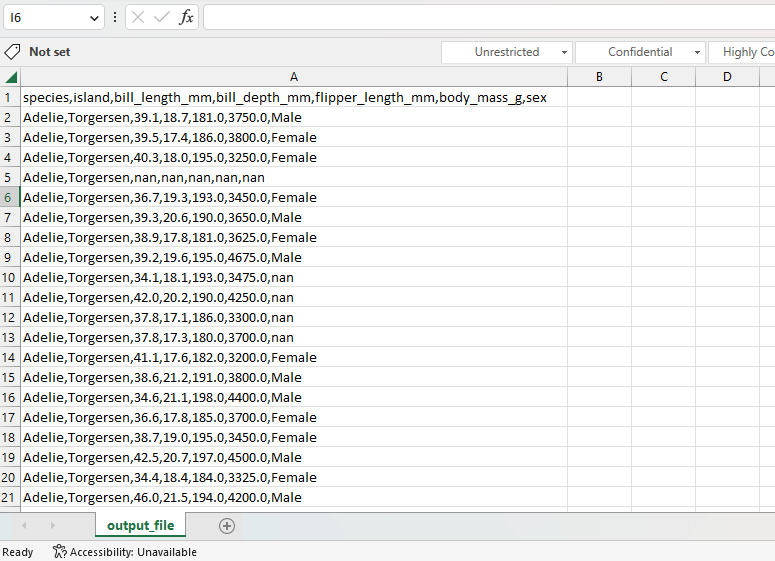

Note that every time we write a row using `writerow()` or `writerows()` or both of them, it appends the row(s) in the specified file

Also take into account the `newline=''` when you read and write using the CSV library. This parameter has to do with the newline translation that occurs when you read a file with Python. Read <a href="https://stackoverflow.com/a/70428825/14686923">this</a> for more information.

In [55]:
# let's read it now using the default writer of csv
# the file will by default be decoded into UNICODE so if you need different format use the encoding parameter

with open(output, 'r', newline='', encoding='utf-8') as fr:
    reader = csv.reader(fr) # create the reader instance 
    
    # save the header into a variable by getting the next value of the iterator
    header = list(next(reader))
    
    # loop through the data and get each row as a list
    for row in reader:
        print(row)

['Adelie', 'Torgersen', '39.1', '18.7', '181.0', '3750.0', 'Male']
['Adelie', 'Torgersen', '39.5', '17.4', '186.0', '3800.0', 'Female']
['Adelie', 'Torgersen', '40.3', '18.0', '195.0', '3250.0', 'Female']
['Adelie', 'Torgersen', 'nan', 'nan', 'nan', 'nan', 'nan']
['Adelie', 'Torgersen', '36.7', '19.3', '193.0', '3450.0', 'Female']
['Adelie', 'Torgersen', '39.3', '20.6', '190.0', '3650.0', 'Male']
['Adelie', 'Torgersen', '38.9', '17.8', '181.0', '3625.0', 'Female']
['Adelie', 'Torgersen', '39.2', '19.6', '195.0', '4675.0', 'Male']
['Adelie', 'Torgersen', '34.1', '18.1', '193.0', '3475.0', 'nan']
['Adelie', 'Torgersen', '42.0', '20.2', '190.0', '4250.0', 'nan']
['Adelie', 'Torgersen', '37.8', '17.1', '186.0', '3300.0', 'nan']
['Adelie', 'Torgersen', '37.8', '17.3', '180.0', '3700.0', 'nan']
['Adelie', 'Torgersen', '41.1', '17.6', '182.0', '3200.0', 'Female']
['Adelie', 'Torgersen', '38.6', '21.2', '191.0', '3800.0', 'Male']
['Adelie', 'Torgersen', '34.6', '21.1', '198.0', '4400.0', 'Male

Now let's do the same procedure but using the DictWriter and DictReader. These classes map the information of each row into a dictionary. It is very useful !!

In [56]:
# let's change the ouput file name
output = 'output_file2.csv'

# also let's change the data format to a list of dictionaries
data2 = data_df.to_dict(orient='records')
data2

[{'species': 'Adelie',
  'island': 'Torgersen',
  'bill_length_mm': 39.1,
  'bill_depth_mm': 18.7,
  'flipper_length_mm': 181.0,
  'body_mass_g': 3750.0,
  'sex': 'Male'},
 {'species': 'Adelie',
  'island': 'Torgersen',
  'bill_length_mm': 39.5,
  'bill_depth_mm': 17.4,
  'flipper_length_mm': 186.0,
  'body_mass_g': 3800.0,
  'sex': 'Female'},
 {'species': 'Adelie',
  'island': 'Torgersen',
  'bill_length_mm': 40.3,
  'bill_depth_mm': 18.0,
  'flipper_length_mm': 195.0,
  'body_mass_g': 3250.0,
  'sex': 'Female'},
 {'species': 'Adelie',
  'island': 'Torgersen',
  'bill_length_mm': nan,
  'bill_depth_mm': nan,
  'flipper_length_mm': nan,
  'body_mass_g': nan,
  'sex': nan},
 {'species': 'Adelie',
  'island': 'Torgersen',
  'bill_length_mm': 36.7,
  'bill_depth_mm': 19.3,
  'flipper_length_mm': 193.0,
  'body_mass_g': 3450.0,
  'sex': 'Female'},
 {'species': 'Adelie',
  'island': 'Torgersen',
  'bill_length_mm': 39.3,
  'bill_depth_mm': 20.6,
  'flipper_length_mm': 190.0,
  'body_mass_g'

In [57]:
# now let's do the same thing but using DictWriter (it helps because it reads in dictionaries)
# create a file
with open(output, 'w', newline='') as fw:
    
    # create the DictWriter method and pass the names of the columns
    writer = csv.DictWriter(fw, fieldnames=column_names) 
    
    # use writeheader() to write the headers
    writer.writeheader() 
    
    # write multiple rows using the writerows method
    # The writerows must have a list of dictionaries as the input
    writer.writerows(data2) 
    
    #NOTE: you can also use writer.writerow() here to write a single row by passing a single dictionary as an input
  
    

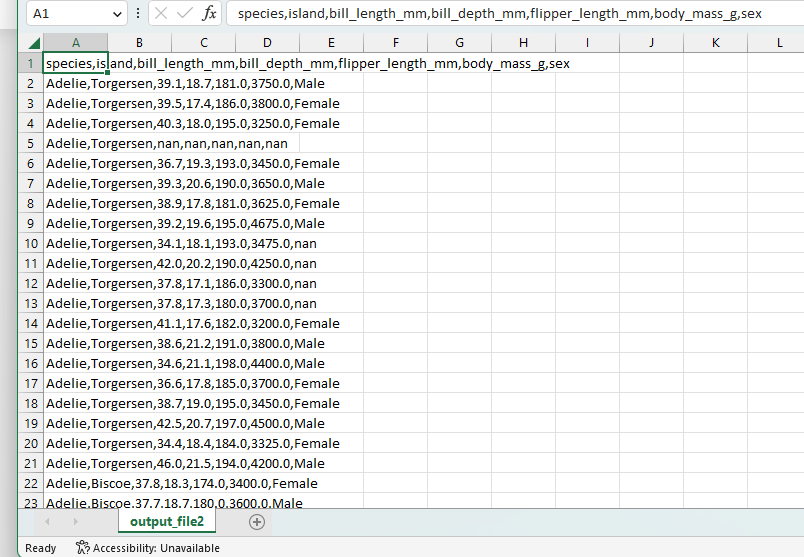

In [60]:
# read the file into dictionaries now, using the DictReader

with open(output, 'r', newline='') as fr:
    
    # create the reader instance
    reader = csv.DictReader(fr)
    
    # loop through the reader. Each row will be a dictionary. 
    # You can get the column names, by getting the keys of a single dict
    for row in reader:
        print(row) # read each row in a dictionary form
    
    # you can get the column names by getting the keys of the last dictionary in the reader
    field_names = list(row.keys())

{'species': 'Adelie', 'island': 'Torgersen', 'bill_length_mm': '39.1', 'bill_depth_mm': '18.7', 'flipper_length_mm': '181.0', 'body_mass_g': '3750.0', 'sex': 'Male'}
{'species': 'Adelie', 'island': 'Torgersen', 'bill_length_mm': '39.5', 'bill_depth_mm': '17.4', 'flipper_length_mm': '186.0', 'body_mass_g': '3800.0', 'sex': 'Female'}
{'species': 'Adelie', 'island': 'Torgersen', 'bill_length_mm': '40.3', 'bill_depth_mm': '18.0', 'flipper_length_mm': '195.0', 'body_mass_g': '3250.0', 'sex': 'Female'}
{'species': 'Adelie', 'island': 'Torgersen', 'bill_length_mm': 'nan', 'bill_depth_mm': 'nan', 'flipper_length_mm': 'nan', 'body_mass_g': 'nan', 'sex': 'nan'}
{'species': 'Adelie', 'island': 'Torgersen', 'bill_length_mm': '36.7', 'bill_depth_mm': '19.3', 'flipper_length_mm': '193.0', 'body_mass_g': '3450.0', 'sex': 'Female'}
{'species': 'Adelie', 'island': 'Torgersen', 'bill_length_mm': '39.3', 'bill_depth_mm': '20.6', 'flipper_length_mm': '190.0', 'body_mass_g': '3650.0', 'sex': 'Male'}
{'spec

In [61]:
field_names

['species',
 'island',
 'bill_length_mm',
 'bill_depth_mm',
 'flipper_length_mm',
 'body_mass_g',
 'sex']